In [20]:
import random
from PIL import Image
import matplotlib.pyplot as plt
from time import perf_counter
import numpy as np 

### 输入n行m列


In [21]:
n = eval(input("请输入数字n代表n行:"))
m = eval(input("请输入数字m代表m列:"))

请输入数字n代表n行:3
请输入数字m代表m列:4


### 导入图片并将其转化为数组

(1920, 1442, 3)


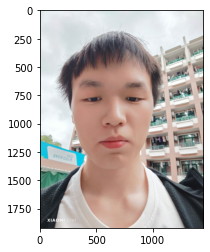

In [22]:
image = Image.open(r"C:\Users\hu'shu'hao\Desktop\R(H5)8W]UIXKS9PVPDIM}47.jpg")
image = np.array(image)
print(image.shape)
plt.imshow(image)


### 根据输入的n对图像进行居中裁剪处理


该图片的大小为(1920, 1440, 3)


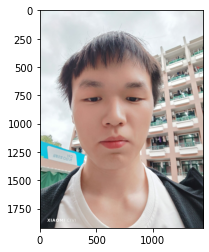

In [23]:
flag = 0 #判断是否在行上进行裁剪
crop = 0 #判断是否进行了裁剪
flag_Col = 0#判断是否进行了列的裁剪
height = image.shape[0]#分别取出图片的宽和高
width = image.shape[1]


remainder_row = image.shape[0]%n
remainder_col = image.shape[1]%m

if remainder_row!=0:
    delta_row = int(remainder_row/2)
    
    if remainder_row%2==0:#根据余数判断切片是否需要多减一
#在height上进行居中裁剪，把两边给裁剪掉
        image_crop_Row = np.split(image,range(0,height,1),axis=0)#axis=0为按行切分，axis=1为按列切分
        image_crop_RowConnect = np.concatenate(image_crop_Row[delta_row:height-delta_row],axis=0) 
    else:
        image_crop_Row = np.split(image,range(0,height,1),axis=0)
        image_crop_RowConnect = np.concatenate(image_crop_Row[delta_row:height-delta_row-1],axis=0)     
        
    flag = 1
    crop = 1

if remainder_col!=0:
    delta_col = int(remainder_col/2)
    if remainder_col%2 ==0:
    #如果flag=1说明，执行了对行的裁剪，就有了image_crop_1这个变量   
        if flag==1:
            image_crop_Col = np.split(image_crop_RowConnect,range(0,width,1),axis=1)#在width上进行裁剪
            image_crop_ColConnect = np.concatenate(image_crop_Col[delta_col:width-delta_col],axis=1)
        else:
            image_crop_Col = np.split(image,range(0,width,1),axis=1)
            image_crop_ColConnect = np.concatenate(image_crop_Col[delta_col:width-delta_col],axis=1)
    
    else:
        if flag==1:
            image_crop_Col = np.split(image_crop_RowConnect,range(0,width,1),axis=1)#在width上进行裁剪
            image_crop_ColConnect = np.concatenate(image_crop_Col[delta_col:width-delta_col],axis=1)
        else:
            image_crop_Col = np.split(image,range(0,width,1),axis=1)
            image_crop_ColConnect = np.concatenate(image_crop_Col[delta_col:width-delta_col],axis=1)
    crop = 1 
    flag_Col=1
if crop == 0:
    print("该图片不需要裁剪")
    plt.imshow(image)
else:
    if flag_Col == 0:
        plt.imshow(image_crop_RowConnect)
        print("该图片的大小为{}".format(image_crop_RowConnect.shape))
    else:
        plt.imshow(image_crop_ColConnect)
        print("该图片的大小为{}".format(image_crop_ColConnect.shape))

### 分割成n行m列的图片



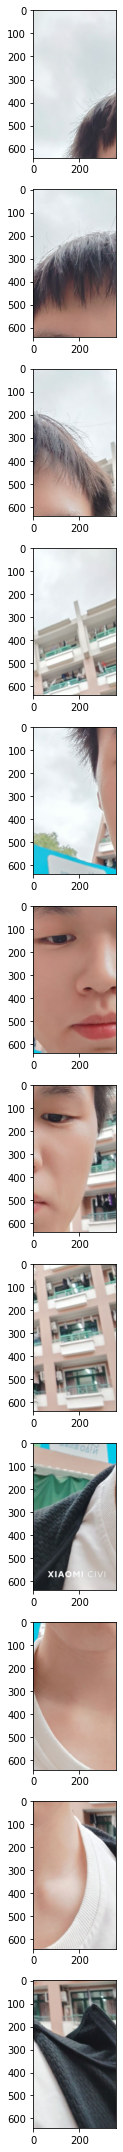

In [24]:
#首先要确定是否对图片进行了裁剪
if flag == 1:
    image_crop_ColConnect = image_crop_RowConnect
if crop==0:
    row_partition = np.split(image,range(0,height),axis=0)
else:
    row_partition = np.split(image_crop_ColConnect,range(0,height),axis=0)
    
# 仅对行分割
# ha = 0
# hb = height//n
# fig ,ax = plt.subplots(n)
# for i in range(n):
#     row_partition_connect = np.concatenate(row_partition[ha:hb],axis=0)
#     ax[i].imshow(row_partition_connect)
#     ha = ha +height//n
#     hb = hb +height//n
# plt.tight_layout()

#定义边界
ha = 0
hb = height//n
wa = 0
wb = width//m
fig ,ax = plt.subplots(n*m, figsize=(30, 30))
cnt = 0
for i in range(n):
    row_partition_connect = np.concatenate(row_partition[ha:hb+1],axis=0)
    for j in range(m):
        col_partirion = np.split(row_partition_connect,range(0,width),axis=1)
        col_partirion_connect = np.concatenate(col_partirion[wa:wb],axis=1)
        ax[cnt].imshow(col_partirion_connect)#cnt代表了第几个图片
        cnt+=1
        wa = wa+width//m
        wb = wb+width//m
    
    ha = ha +height//n
    hb = hb +height//n
    wa = 0
    wb = width//m
plt.tight_layout()


### 随机组合

下面是分割的图像的大小：
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)
(639, 359, 3)


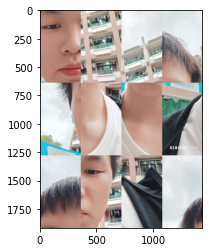

In [66]:
ha = 0
hb = height//n
wa = 0
wb = width//m
col_partirion_connect=[]
for i in range(n):
    row_partition_connect = np.concatenate(row_partition[ha+1:hb],axis=0)
    for j in range(m):
        col_partirion = np.split(row_partition_connect,range(0,width),axis=1)
        col_partirion_connect.append(np.concatenate(col_partirion[wa+1:wb],axis=1))
        wa = wa+width//m
        wb = wb+width//m
    
    ha = ha +height//n
    hb = hb +height//n
    wa = 0
    wb = width//m

print("下面是分割的图像的大小：")
for i in range(n*m):
    print(col_partirion_connect[i].shape)

left = 0
right = m-1

Total = []
index_list = [i for i in range(n*m)]
for i in range(n):
    index1 = random.choice(index_list)
    index_list.remove(index1)
    Combination = col_partirion_connect[index1]
    for i in range(m-1):
        index2 = random.choice(index_list)
        Combination = np.concatenate((Combination,col_partirion_connect[index2]),axis=1)
        index_list.remove(index2)
    Total.append(Combination)
    left = left+m-1
    right = right+m-1
    
    

test = [i for i in range(n)]
indexT = random.choice(test)
Total_Combination = Total[indexT]
test.remove(indexT)
for i in range(n-1):
    indexT1 = random.choice(test)
    Total_Combination_another = Total[indexT1]
    Total_Combination = np.concatenate((Total_Combination,Total_Combination_another),axis=0)
    test.remove(indexT1)

img = Image.fromarray(Total_Combination)
plt.imshow(img)